![CF](https://dataconomy.com/wp-content/uploads/2015/03/Beginners-Guide-Recommender-Systems-Collaborative-Filtering-620x340.jpg)

## **Collaborative Filtering**
+ **predicting** what **users** will **like** based on their **similarity to other users.**
+ **Advantages:** capable of accurately recommending complex items such as movies without requiring an “understanding” of the item itself. 
+ many  have been used in measuring (**user similarity** or **item similarity**) in **recommender systems.** 
+ **Task 1**: finding similar animes
+ **Task 2**: finding similar users
+ **Task 3**: Recommending Animes for a random user

In [1]:
INPUT_DIR = '/kaggle/input/anime-recommendation-database-2020'
!ls {INPUT_DIR}

 anime.csv		   animelist.csv   rating_complete.csv
 anime_with_synopsis.csv  'html folder'    watching_status.csv


In [2]:
import numpy as np
import pandas as pd

rating_df = pd.read_csv(INPUT_DIR + '/animelist.csv', 
                        low_memory=False, 
                        usecols=["user_id", "anime_id", "rating"]
                        , nrows=1048576
                        )
rating_df.head(4)

,user_id,anime_id,rating
0,0,67,9
1,0,6702,7
2,0,242,10
3,0,4898,0


In [3]:
# User should rate atleast 400 animies
n_ratings = rating_df['user_id'].value_counts()
rating_df = rating_df[rating_df['user_id'].isin(n_ratings[n_ratings >= 400].index)].copy()
len(rating_df)

666308

In [4]:
# Scaling BTW (0 , 1.0)
min_rating = min(rating_df['rating'])
max_rating = max(rating_df['rating'])
rating_df['rating'] = rating_df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values.astype(np.float64)

AvgRating = np.mean(rating_df['rating'])
print('Avg', AvgRating)

Avg 0.3987333185253666


In [5]:
# Removing Duplicated Rows
duplicates = rating_df.duplicated()

if duplicates.sum() > 0:
    print('> {} duplicates'.format(duplicates.sum()))
    rating_df = rating_df[~duplicates]

print('> {} duplicates'.format(rating_df.duplicated().sum()))

> 0 duplicates


![](https://content.codecademy.com/programs/code-foundations-path/ds-survey/utilitymatrix.gif)

In [6]:
g = rating_df.groupby('user_id')['rating'].count()
top_users = g.dropna().sort_values(ascending=False)[:20]
top_r = rating_df.join(top_users, rsuffix='_r', how='inner', on='user_id')

g = rating_df.groupby('anime_id')['rating'].count()
top_animes = g.dropna().sort_values(ascending=False)[:20]
top_r = top_r.join(top_animes, rsuffix='_r', how='inner', on='anime_id')

pd.crosstab(top_r.user_id, top_r.anime_id, top_r.rating, aggfunc=np.sum)

anime_id,1535,1575,2001,2167,4224,5081,5114,6547,6746,9253,9919,9989,10620,11757,15809,16498,19815,20507,22319,30276
user_id,,,,,,,,,,,,,,,,,,,,
146,0.9,NaN,NaN,0.9,0.9,0.0,0.0,0.7,0.6,0.0,0.6,0.8,0.8,0.8,0.0,0.7,0.8,0.9,0.8,0.5
240,0.8,0.8,0.8,0.4,0.7,0.7,0.7,0.7,0.8,0.9,0.5,0.0,0.7,0.8,0.7,0.8,0.8,0.6,0.5,0.6
436,NaN,0.0,0.0,0.7,0.0,NaN,0.8,0.0,0.0,0.0,0.7,0.0,0.0,1.0,1.0,0.0,0.9,0.9,0.0,0.9
446,0.9,1.0,0.9,1.0,0.9,0.8,0.9,0.8,0.8,0.8,NaN,0.9,0.7,0.9,0.0,0.8,0.7,0.7,0.8,0.8
781,1.0,0.6,1.0,NaN,0.7,0.5,NaN,0.9,0.7,1.0,0.7,0.7,0.9,0.6,0.7,0.9,0.7,0.7,0.7,1.0
890,0.9,0.7,0.9,0.9,0.4,0.2,0.9,0.7,0.3,0.0,NaN,0.5,0.6,0.1,NaN,0.7,NaN,NaN,0.0,0.7
912,1.0,1.0,1.0,0.0,0.0,0.9,0.0,0.9,0.8,0.9,0.0,0.8,0.5,0.0,0.8,0.8,0.7,0.9,0.3,0.9
943,0.8,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.8,1.0,0.9,0.9,NaN,1.0,0.9,NaN,1.0,1.0
995,0.9,0.0,0.9,0.8,0.9,0.0,0.8,0.0,0.0,1.0,0.0,0.9,0.8,0.8,0.8,0.9,0.8,0.9,0.9,0.9


## **Data Preprocessing**

In [7]:
# Encoding categorical data
user_ids = rating_df["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded2user = {i: x for i, x in enumerate(user_ids)}
rating_df["user"] = rating_df["user_id"].map(user2user_encoded)
n_users = len(user2user_encoded)

anime_ids = rating_df["anime_id"].unique().tolist()
anime2anime_encoded = {x: i for i, x in enumerate(anime_ids)}
anime_encoded2anime = {i: x for i, x in enumerate(anime_ids)}
rating_df["anime"] = rating_df["anime_id"].map(anime2anime_encoded)
n_animes = len(anime2anime_encoded)

print("Num of users: {}, Num of animes: {}".format(n_users, n_animes))
print("Min rating: {}, Max rating: {}".format(min(rating_df['rating']), max(rating_df['rating'])))

Num of users: 882, Num of animes: 13203
Min rating: 0.0, Max rating: 1.0


In [8]:
# Shuffle
rating_df = rating_df.sample(frac=1, random_state=73)

X = rating_df[['user', 'anime']].values
y = rating_df["rating"]

In [9]:
# Split
test_set_size = 10000 #10k for test set
train_indices = rating_df.shape[0] - test_set_size 

X_train, X_test, y_train, y_test = (
    X[:train_indices],
    X[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

print('> Train set ratings: {}'.format(len(y_train)))
print('> Test set ratings: {}'.format(len(y_test)))

> Train set ratings: 656308
> Test set ratings: 10000


In [10]:
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [11]:
# # Detect TPU, return appropriate distribution strategy
# try:
#     tpu = tf.distribute.cluster_resolver.TPUClusterResolver() 
#     print('Running on TPU ', tpu.master())
# except ValueError:
#     tpu = None

# if tpu:
#     tf.config.experimental_connect_to_cluster(tpu)
#     tf.tpu.experimental.initialize_tpu_system(tpu)
#     strategy = tf.distribute.experimental.TPUStrategy(tpu)
# else:
#     strategy = tf.distribute.get_strategy() 

# print("REPLICAS: ", strategy.num_replicas_in_sync)

In [12]:
# Accelerator check
import tensorflow as tf

TPU_INIT = True

if TPU_INIT:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    !nvidia-smi
    
print(tf.__version__)

D0815 13:07:55.864049942    6826 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0815 13:07:55.864073194    6826 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0815 13:07:55.864076267    6826 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0815 13:07:55.864079105    6826 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0815 13:07:55.864081567    6826 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0815 13:07:55.864084005    6826 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0815 13:07:55.864087148    6826 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0815 13:07:55.

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


2.12.0


## **Model Building**

In [13]:
# import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [14]:
# Embedding layers
from tensorflow.keras.layers import Add, Activation, Lambda, BatchNormalization, Concatenate, Dropout, Input, Embedding, Dot, Reshape, Dense, Flatten

def RecommenderNet():
    embedding_size = 128
    
    user = Input(name = 'user', shape = [1])
    user_embedding = Embedding(name = 'user_embedding',
                       input_dim = n_users, 
                       output_dim = embedding_size)(user)
    
    anime = Input(name = 'anime', shape = [1])
    anime_embedding = Embedding(name = 'anime_embedding',
                       input_dim = n_animes, 
                       output_dim = embedding_size)(anime)
    
    #x = Concatenate()([user_embedding, anime_embedding])
    x = Dot(name = 'dot_product', normalize = True, axes = 2)([user_embedding, anime_embedding])
    x = Flatten()(x)
        
    x = Dense(1, kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation("sigmoid")(x)
    
    model = Model(inputs=[user, anime], outputs=x)
    model.compile(loss='binary_crossentropy', metrics=["mae", "mse"], optimizer='Adam')
    
    return model

if TPU_INIT:    
    with tpu_strategy.scope():
        model = RecommenderNet()
else:
    model = RecommenderNet()

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 anime (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 user_embedding (Embedding)     (None, 1, 128)       112896      ['user[0][0]']                   
                                                                                                  
 anime_embedding (Embedding)    (None, 1, 128)       1689984     ['anime[0][0]']                  
                                                                                              

In [15]:
# Callbacks
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau

start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005
batch_size = 10000

if TPU_INIT:
    max_lr = max_lr * tpu_strategy.num_replicas_in_sync
    batch_size = batch_size * tpu_strategy.num_replicas_in_sync

rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr


lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=0)

checkpoint_filepath = './weights.h5'

model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                        save_weights_only=True,
                                        monitor='val_loss',
                                        mode='min',
                                        save_best_only=True)

early_stopping = EarlyStopping(patience = 3, monitor='val_loss', 
                               mode='min', restore_best_weights=True)

my_callbacks = [
    model_checkpoints,
    lr_callback,
    early_stopping,   
]

In [16]:
# Model training
history = model.fit(
    x=X_train_array,
    y=y_train,
    batch_size=batch_size,
    epochs=20,
    verbose=1,
    validation_data=(X_test_array, y_test),
    callbacks=my_callbacks
)

model.load_weights(checkpoint_filepath)

Epoch 1/20


2023-08-15 13:08:11.224016: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-08-15 13:08:11.376954: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


9/9 [==============================] - ETA: 0s - loss: 0.7954 - mae: 0.3870 - mse: 0.2002

2023-08-15 13:08:16.891595: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-08-15 13:08:17.041593: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


9/9 [==============================] - 9s 529ms/step - loss: 0.7954 - mae: 0.3870 - mse: 0.2002 - val_loss: 0.6949 - val_mae: 0.3691 - val_mse: 0.1614 - lr: 1.0000e-05
Epoch 2/20
9/9 [==============================] - 1s 101ms/step - loss: 0.7936 - mae: 0.3861 - mse: 0.1995 - val_loss: 0.6949 - val_mae: 0.3691 - val_mse: 0.1614 - lr: 8.8000e-05
Epoch 3/20
9/9 [==============================] - 1s 89ms/step - loss: 0.7878 - mae: 0.3834 - mse: 0.1970 - val_loss: 0.6949 - val_mae: 0.3692 - val_mse: 0.1614 - lr: 1.6600e-04
Epoch 4/20
9/9 [==============================] - 1s 87ms/step - loss: 0.7780 - mae: 0.3788 - mse: 0.1929 - val_loss: 0.6947 - val_mae: 0.3692 - val_mse: 0.1613 - lr: 2.4400e-04
Epoch 5/20
9/9 [==============================] - 1s 88ms/step - loss: 0.7643 - mae: 0.3723 - mse: 0.1872 - val_loss: 0.6945 - val_mae: 0.3692 - val_mse: 0.1612 - lr: 3.2200e-04
Epoch 6/20
9/9 [==============================] - 1s 88ms/step - loss: 0.7464 - mae: 0.3638 - mse: 0.1796 - val_loss: 0

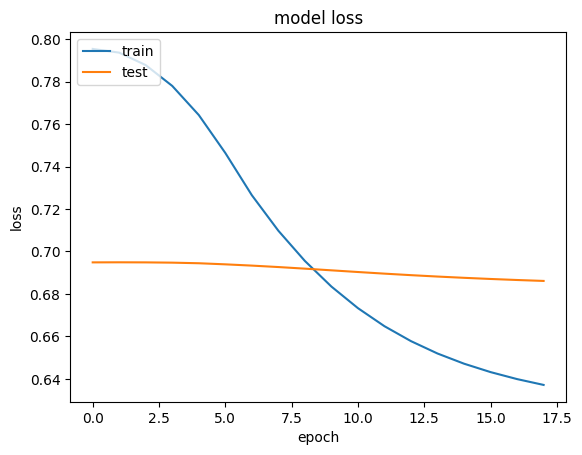

In [17]:
#Training results
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history["loss"][0:-2])
plt.plot(history.history["val_loss"][0:-2])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

## **Extracting weights from model**

In [18]:
def extract_weights(name, model):
    weight_layer = model.get_layer(name)
    weights = weight_layer.get_weights()[0]
    weights = weights / np.linalg.norm(weights, axis = 1).reshape((-1, 1))
    return weights

anime_weights = extract_weights('anime_embedding', model)
user_weights = extract_weights('user_embedding', model)

### **anime meta data**

In [19]:
df = pd.read_csv(INPUT_DIR + '/anime.csv', low_memory=True)
df = df.replace("Unknown", np.nan)

In [20]:
# Fixing Names
def getAnimeName(anime_id):
    try:
        name = df[df.anime_id == anime_id].eng_version.values[0]
        if name is np.nan:
            name = df[df.anime_id == anime_id].Name.values[0]
    except:
        print('error')
    
    return name

df['anime_id'] = df['MAL_ID']
df["eng_version"] = df['English name']
df['eng_version'] = df.anime_id.apply(lambda x: getAnimeName(x))

df.sort_values(by=['Score'], 
               inplace=True,
               ascending=False, 
               kind='quicksort',
               na_position='last')

df = df[["anime_id", "eng_version", 
         "Score", "Genres", "Episodes", 
         "Type", "Premiered", "Members"]]

In [21]:
def getAnimeFrame(anime):
    if isinstance(anime, int):
        return df[df.anime_id == anime]
    if isinstance(anime, str):
        return df[df.eng_version == anime]

### **sypnopsis data**

In [22]:
cols = ["MAL_ID", "Name", "Genres", "sypnopsis"]
sypnopsis_df = pd.read_csv(INPUT_DIR + '/anime_with_synopsis.csv', usecols=cols)

def getSypnopsis(anime):
    if isinstance(anime, int):
        return sypnopsis_df[sypnopsis_df.MAL_ID == anime].sypnopsis.values[0]
    if isinstance(anime, str):
        return sypnopsis_df[sypnopsis_df.Name == anime].sypnopsis.values[0]

## **Task 1**: Finding Similar Animes (Item Based Recommendation)

In [23]:
#pd.reset_option('all')
pd.set_option("max_colwidth", None)

def find_similar_animes(name, n=10, return_dist=False, neg=False):
    try:
        index = getAnimeFrame(name).anime_id.values[0]
        encoded_index = anime2anime_encoded.get(index)
        weights = anime_weights
        
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        
        n = n + 1            
        
        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('animes closest to {}'.format(name))

        if return_dist:
            return dists, closest
        
        rindex = df

        SimilarityArr = []

        for close in closest:
            decoded_id = anime_encoded2anime.get(close)
            sypnopsis = getSypnopsis(decoded_id)
            anime_frame = getAnimeFrame(decoded_id)
            
            anime_name = anime_frame.eng_version.values[0]
            genre = anime_frame.Genres.values[0]
            similarity = dists[close]
            SimilarityArr.append({"anime_id": decoded_id, "name": anime_name,
                                  "similarity": similarity,"genre": genre,
                                  'sypnopsis': sypnopsis})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)
        return Frame[Frame.anime_id != index].drop(['anime_id'], axis=1)

    except:
        print('{}!, Not Found in Anime list'.format(name))

### **these animes are my fav**

![](https://i.pinimg.com/originals/1f/cb/2a/1fcb2af4376fe78b6d82197bd1fdbff6.gif)

In [24]:
find_similar_animes('Dragon Ball Z', n=5, neg=False)

animes closest to Dragon Ball Z


,name,similarity,genre,sypnopsis
4,Hetalia World Series,0.369275,"Comedy, Historical, Parody","The third and fourth seasons of the Hetalia Axis Powers anime. A continuation of the first 2 seasons under a new name, still adapting the online webcomics drawn by Himaruya Hidekaz. Based on a popular web-released manga series by Hidekazu Himaruya, this has been described as a ""cynical gag"" story set in Europe in the years between WW1 and WW2 (1915-1939), using exaggerated caricatures of the different nationalities as portrayed by a gaggle of bishōnen. For example, the Italia Veneziano character is into pasta and women. The Deutsche (German) bishi loves potatoes and sausages, and Nippon is an otaku boy. Installments of the manga have jumped back and forth in setting from the ancient times to modern-day geopolitics. The manga's title comes the Japanese words for ""useless"" (hetare) and Italy (Italia). (Source: ANI)"
3,A Letter to Momo,0.282327,"Supernatural, Drama","fter the unexpected death of her father, 11-year-old Momo Miyaura leaves Tokyo with her mother and moves to an old remote island in Seto Inland Sea. The only memento she has from her father is an unfinished letter with only two words inside: ""Dear Momo""—along with her heart's unrest from it. In the new and unfamiliar small town, Momo reluctantly tries to adjust to the outmoded wooden buildings, silent crop fields, and mysterious isolated shrines. One day, while exploring the attic of her new home, she finds a worn out picture book about youkai. Following this discovery, strange things begin to happen around town, and Momo is greeted by the arrival of three troublesome youkai. Momo e no Tegami tells the story of a young girl as she struggles to adapt to her bizarre new life and ultimately come to terms with her father's mysterious letter."
2,ACCA: 13-ku Kansatsu-ka Specials,0.279091,"Slice of Life, Seinen",Short specials of ACCA: 13-ku Kansatsu-ka included on the three BD Box Sets. The first episode focuses on Jean and Lotta where Lotta reflects how Jean is very forgetful day-to-day yet remembers the most important things. The second episode focuses on Nino and Jean out drinking at a bar. Nino pokes at Jean for not having any friends outside of himself and Lotta. The conversation then steers toward women.
1,The Royal Tutor,0.274687,"Slice of Life, Comedy, Historical, Shounen","Equally charming and stern, Heine Wittgenstein is a brilliant man who commands respect, despite his short, childlike stature. Thus, the king of Grannzreich has called upon Heine to undertake a daunting task that has driven away many before him—become the new royal tutor to four princes who are in line for the throne. The four heirs each have very distinct and troublesome personalities: Licht, the flirtatious youngest prince; his immature older brother Leonhard; Bruno the studious third prince; and Kai, the oldest of the four and the most reserved. Hilarity ensues as Heine attempts to connect with each of the princes in order to groom them for the throne. However, Heine's mysterious past and dark undercurrents in the present may threaten the harmony within the kingdom."
0,True Tears Recap,0.273970,Drama,"cap of the first ten episodes of True Tears , included on the Blu-ray Box volume."


![](https://64.media.tumblr.com/1b942774dc6d4240cfbb3da22d99a681/tumblr_phsucvmeDT1sivxmj_500.gifv)

In [25]:
find_similar_animes('Your Name.', n=5, neg=False)

animes closest to Your Name.


,name,similarity,genre,sypnopsis
4,Batman Ninja,0.315569,"Action, Martial Arts, Samurai","kham Asylum, Batman clashes with Gorilla Grodd while trying to destroy Grodd's newest invention: the Quake Engine. Amidst the chaos, the engine activates, and the entire asylum suddenly vanishes into thin air—Batman along with it. Once the dust settles, Batman finds himself standing in the middle of an unfamiliar road. He soon realizes that he is no longer in Gotham City—but instead in Feudal Japan! The amazement quickly fades as samurai descend upon him, seeking to take his life. Later on, Batman's investigation leads him to discover that the one responsible for the kill order is none other than his archnemesis, the Joker. Following an encounter with Catwoman, he learns that the asylum's criminals had teleported there two years earlier—each ruling over a piece of Japan with Joker being the dominant warlord. In order to return home, Batman must reactivate the Quake Engine, situated in the remnants of the asylum, now known as Arkham Castle. However, there is one problem: aside from his gadget belt, the arsenal that was once at his fingertips is all but gone. Ninja Batman follows the Dark Knight as he traverses a strange new environment, facing off against familiar foes in a bid to return to Gotham in one piece."
3,Overlord: Ple Ple Pleiades - Clementine Toubou-hen,0.308410,"Action, Comedy, Magic, Fantasy","Clementine escapes from almighty Ainz's gaze, and Albedo with the help of Aura, Mare, and a gratuitously large army of poorly-animated CG goblins must track her down, and eliminate anything that stands in her way, Guardian."
2,Kamigami no Ki,0.305318,"Comedy, Historical, Supernatural","Set during 3000 BCE in the Nile region of Egypt, Kamigami no Ki (""Chronicles of the Gods"") will depict the comical misadventures of Bastet, Anubis, Ra, and the mysterious ghost Medjedo as well as their caretakers, Iabi and Ahkeu. (Source: Crunchyroll)"
1,Kameari Park Precinct,0.301103,"Action, Comedy, Mystery, Police","The wicked multi-billionaire, Shinatora, builds wretched, ugly buildings. The explosives genius calling himself Benten has targeted Shinatora's empire and begins to destroy the monstrosities that are wiping out whole sections of downtown Tokyo. In cooperation with the local police force, the FBI has sent Lisa Hoshino, a bomb disposal expert, and her robot assistant, Dandy, on a lecture tour of Japan. Ryotsu is reluctantly paired with Lisa to protect the people of the Kameari district. Why does Benten only target Shinatora's buildings? What is his next target? Another email warning arrives at the Katsushika Police Station. Benten's next target is the newly built, gigantic amusement park, Shinatora World. Lisa and Ryotsu hurry to the scene. What they find is a huge Soviet-era rocket armed with a massive bomb powerful enough to obliterate the entire area of Katsushika. What can Ryotsu do? (Source: AniDB)"
0,Lime-iro Ryuukitan X,0.281861,"Harem, Historical, Supernatural, Drama, Ecchi, Mecha","It was Meiji 38 (1905), the Russo-Japanese War that had begun since the previous year was getting hard. In this severe circumstance, they reorganized the Raimu Squad. The members of the Raimu Squad were the girls. They were just like other ordinary girls who went to schools and yearned for love, except that they had ""Raimu."" Inukai Tsuyoshiro was a young man who was newly chosen to be the leader of the squad. He was ambitious to fight for Japan. When the young man met the five girls, the new chapter of ""Raimu"" began. (Source: AnimeNfo)"


![](https://i.pinimg.com/originals/26/fd/49/26fd49fa54b204fbaf6301efefd53ae2.gif)

In [26]:
find_similar_animes('Sword Art Online', n=5, neg=False)

animes closest to Sword Art Online


,name,similarity,genre,sypnopsis
4,Food Wars! Shokugeki no Soma,0.319944,"Ecchi, School, Shounen","Ever since he was a child, fifteen-year-old Souma Yukihira has helped his father by working as the sous chef in the restaurant his father runs and owns. Throughout the years, Souma developed a passion for entertaining his customers with his creative, skilled, and daring culinary creations. His dream is to someday own his family's restaurant as its head chef. Yet when his father suddenly decides to close the restaurant to test his cooking abilities in restaurants around the world, he sends Souma to Tootsuki Culinary Academy, an elite cooking school where only 10 percent of the students graduate. The institution is famous for its ""Shokugeki"" or ""food wars,"" where students face off in intense, high-stakes cooking showdowns. As Souma and his new schoolmates struggle to survive the extreme lifestyle of Tootsuki, more and greater challenges await him, putting his years of learning under his father to the test."
3,Dimension Movement of Nazca,0.306197,"Action, Adventure, Drama, Magic, Fantasy","ura Kyoji, a dedicated kendo student, discovers that his shisho (master) Tate Masanari is a reincarnated Incan warrior named Yawaru who wishes to destroy the world to purify it. Kyoji himself is the warrior Bilka, who foiled Yawaru's plans in their previous lives. Yawaru gathers other awakened spirits to release the powers of nature. Now Kyoji must wrestle with his own fate and decide if he is merely a vessel for the reincarnated soul or if he is truly Miura Kyoji and which will be better able to save the world and the future as he knows it. (Source: ANN)"
2,Wo Jiao Bai Xiaofei,0.303043,"Action, Comedy, Horror","Bai Xiaofei lived a dull, boring life. That all changes when, on his way to find his girlfriend, he meets a mutant with unprecedented power. As an ordinary human being, Xiaofei felt totally out of his depth; there was no way he could defeat powerful enemies and track down the cause of these strange mutations. After giving himself a shot of body enhancer bought online, however, he gradually reaches his potential. (Source: Haoliners.net)"
1,Reikenzan: Eichi e no Shikaku,0.300150,"Comedy, Magic, Fantasy","fter two years of studying within the Reiken clan, Ouriku and other inexperienced disciples are ordered to descend to the temporal world for further studies, and Ouriku embarks the journey back to his birthplace. (Source: ANN)"
0,The Seven Deadly Sins:Revival of the Commandments,0.298524,"Action, Adventure, Fantasy, Magic, Shounen, Supernatural","The fierce battle between Meliodas, the captain of the Seven Deadly Sins, and the Great Holy Knight Hendrickson has devastating consequences. Armed with the fragments necessary for the revival of the Demon Clan, Hendrickson breaks the seal, allowing the Commandments to escape, all of whom are mighty warriors working directly under the Demon King himself. Through a mysterious connection, Meliodas instantly identifies them; likewise, the 10 Commandments, too, seem to sense his presence. As the demons leave a path of destruction in their wake, the Seven Deadly Sins must find a way to stop them before the Demon Clan drowns Britannia in blood and terror."


![](https://steamuserimages-a.akamaihd.net/ugc/993512070845192516/C18040A95DB14DD58438DDDEBF721BA8ABAD0E84/)

In [27]:
find_similar_animes('Black Clover', n=5, neg=False)

animes closest to Black Clover


,name,similarity,genre,sypnopsis
4,Seitokai Yakuindomo OVA,0.332879,"Comedy, School, Shounen, Slice of Life",It is the start of Takatoshi Tsuda's second year as the put-upon vice president of the student council and his sister Kotomi is entering school as a first year. New friends and double entendres are made. (Source: ANN)
3,Macross F: Choujikuu Gekijou,0.320811,"Comedy, Slice of Life",short CGI movie and a short extra anime bundled with the special edition of the game Macross Triangle Frontier .
2,Mai-Mai Miracle,0.318090,"Adventure, Drama","The story is set in 1955 in Kokuga, Hofu City, Yamaguchi Prefecture. One thousand years ago it was the site of the ancient capital, Suo no Kuni, and traces of the Heian Period (year 794-1185) are passed down to us in the form of ruins and historical place names. The protagonist is Shinko, a third grade elementary school student, who was born and raised in one of the town's venerable families. She is a little girl whose characteristic is a strange curl on her forehead (she calls it her ""Mai Mai""), and her love for playing in the fields. On the other hand, her secret joy is to imagine and to daydream about the world of one thousand years ago. Her fantasies travel far into the days of the Heian Period... One day, a girl called Kiiko transfers from Tokyo and enters Shinko's class. This girl from the big city has difficulty feeling at home in this small town, but gradually her friendship with Shinko deepens. Before long, the two of them become engulfed in a strange incident of one thousand years earlier...?!"
1,Cheating Craft,0.317911,"Action, Comedy, School","In a world where academic success decides your entire future, the exam room becomes a ruthless battlefield. Passing the exams guarantees a successful future. Failing dooms you to live a cruel life, tormented by suffering and despair. Only the most intelligent—or cunning—students make it out alive. These are the two strategies of combat: spend your entire life studying for the test, or perfect your cheating strategy. The students who dedicate themselves to studying are called “Learning Type” students, and they are forced to collaborate with a “Cheating Type” student in order to battle their rivals for the top grades. The cheater Zhuge Mu Ming and studious academic Qiao Yi Huang decide to team up against the exams. However, the allies are soon divided, becoming bitter rivals. Will they be able to make it on their own? And if so, who will survive the challenge and emerge victorious?"
0,Knight Hunters,0.299263,"Action, Drama, Shounen","a, Yoji, Ken, and Omi are the four young men who comprise Weiss Kruez (WK), an assassin group who eliminates certain menaces to society. Each member has his own trademark fighting style. Aya is adept at fighting with a katana, Yoji has mastered the art of strangulation via strings, Ken is lethal with his metal claws, while Omi specializes in a wide array of projectiles. Under the command of a mysterious man known only as ""Persia"", the WK is dispatched to take care of drug rings, terrorist factions, and the like. But as things go along, they discover that most, if not all, the bad elements they have dealt with are somehow connected to the Takatori family. The Takatori family is rich, powerful, and influential. It seems if the problem is to be nipped in the bud, the WK would have to put an end to one of Japan's most prominent clans. (Source: AniDB)"


In [28]:
find_similar_animes('Death Note', n=5, neg=False)

animes closest to Death Note


,name,similarity,genre,sypnopsis
4,Monthly Girls' Nozaki-kun,0.355799,"Comedy, Romance, School","Chiyo Sakura is a cheerful high school girl who has fallen head over heels for the oblivious Umetarou Nozaki. Much to Chiyo's confusion, when she confesses to her beloved Nozaki, he hands her an unfamiliar autograph. As it turns out, the stoic teenage boy is actually a respected shoujo mangaka, publishing under the pen name Sakiko Yumeno! A series of misunderstandings leads to Chiyo becoming one of Nozaki's manga assistants. Throughout the hilarious events that ensue, she befriends many of her quirky schoolmates, including her seemingly shameless fellow assistant, Mikoto Mikoshiba, and the ""Prince of the School,"" Yuu Kashima. Gekkan Shoujo Nozaki-kun follows Chiyo as she strives to help Nozaki with his manga and hopes that he will eventually notice her feelings."
3,Danganronpa 3: Monokuma Gekijou,0.326730,"Comedy, Parody",Danganronpa 3 skits included in the Blu-ray Box Sets.
2,Natsume's Book of Friends Season 2,0.320480,"Slice of Life, Demons, Supernatural, Drama, Shoujo","s with its prequel, Zoku Natsume Yuujinchou is about Takashi Natsume, a boy who has had the ability to see youkai since he was young, and his bodyguard youkai Madara, nicknamed Nyanko-sensei. Natsume attempts to return names written in his ""Book of Friends"" (which he inherited from his grandmother Reiko) to youkai in his village. Throughout these adventures, he meets some youkai that are friendly, some that want to steal the Book, and some that want to kill him, as Natsume learns about himself and his relationship with these mysterious beings along the way."
1,Brain Adventure Record Webdiver,0.317447,"Adventure, Mecha, Sci-Fi, Shounen","Set in the year 2100 where the world is tied together by a computer network. The children of the world become Web Divers, adapting their consciousnesses into data, and love to play together in the cyber park called Magical Gate. However, a mysterious computer virus appears beginning to destroy Magical Gate from the inside out. In cyberspace, programs called Web Knights have been created to protect the children. But, the computer virus has turned all the Web Knights against the children. The only Web Knight to escape the ""brainwashing"" is Gladion. Gladion seeks the help of Kaito Yuki, a Web Diver who is in the fourth grade. (Source: ANN)"
0,Angel Beats!,0.314917,"Action, Comedy, Drama, School, Supernatural","Otonashi awakens only to learn he is dead. A rifle-toting girl named Yuri explains that they are in the afterlife, and Otonashi realizes the only thing he can remember about himself is his name. Yuri tells him that she leads the Shinda Sekai Sensen (Afterlife Battlefront) and wages war against a girl named Tenshi. Unable to believe Yuri's claims that Tenshi is evil, Otonashi attempts to speak with her, but the encounter doesn't go as he intended. Otonashi decides to join the SSS and battle Tenshi, but he finds himself oddly drawn to her. While trying to regain his memories and understand Tenshi, he gradually unravels the mysteries of the afterlife."


## **Task 2**: Finding Similar Users (User Based Recommendation)

In [29]:
print('> picking up random user')

ratings_per_user = rating_df.groupby('user_id').size()
random_user = ratings_per_user[ratings_per_user < 500].sample(1, random_state=None).index[0]
print('> user_id:', random_user)

> picking up random user
> user_id: 3388


In [30]:
#pd.reset_option('all')
pd.set_option("max_colwidth", None)

def find_similar_users(item_input, n=10,return_dist=False, neg=False):
    try:
        index = item_input
        encoded_index = user2user_encoded.get(index)
        weights = user_weights
    
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        
        n = n + 1
        
        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('> users similar to #{}'.format(item_input))

        if return_dist:
            return dists, closest
        
        rindex = df
        SimilarityArr = []
        
        for close in closest:
            similarity = dists[close]

            if isinstance(item_input, int):
                decoded_id = user_encoded2user.get(close)
                SimilarityArr.append({"similar_users": decoded_id, 
                                      "similarity": similarity})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", 
                                                        ascending=False)
        
        return Frame
    
    except:
        print('{}!, Not Found in User list'.format(name))

In [31]:
similar_users = find_similar_users(int(random_user), 
                                   n=5, 
                                   neg=False)

similar_users = similar_users[similar_users.similarity > 0.4]
similar_users = similar_users[similar_users.similar_users != random_user]
similar_users.head(5)

> users similar to #3388


,similar_users,similarity


## **User preferences**

In [32]:
# from wordcloud import WordCloud
from collections import defaultdict
import matplotlib.pyplot as plt

def showWordCloud(all_genres):
    genres_cloud = WordCloud(width=700, height=400, 
                             background_color='white', 
                             colormap='gnuplot').generate_from_frequencies(all_genres)
    
    plt.figure(figsize=(10,8)) 
    plt.imshow(genres_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def getFavGenre(frame, plot=False):
        frame.dropna(inplace=False)
        all_genres = defaultdict(int)
        
        genres_list = []
        for genres in frame['Genres']:
            if isinstance(genres, str):
                for genre in genres.split(','):
                    genres_list.append(genre)
                    all_genres[genre.strip()] += 1    
        if plot:
            showWordCloud(all_genres)
        
        return genres_list

    
def get_user_preferences(user_id, plot=False, verbose=0):
    animes_watched_by_user = rating_df[rating_df.user_id==user_id]
    user_rating_percentile = np.percentile(animes_watched_by_user.rating, 75)
    animes_watched_by_user = animes_watched_by_user[animes_watched_by_user.rating >= user_rating_percentile]
    top_animes_user = (
        animes_watched_by_user.sort_values(by="rating", ascending=False)#.head(10)
        .anime_id.values
    )
    
    anime_df_rows = df[df["anime_id"].isin(top_animes_user)]
    anime_df_rows = anime_df_rows[["eng_version", "Genres"]]
    
    if verbose != 0:
        print("> User #{} has rated {} movies (avg. rating = {:.1f})".format(
          user_id, len(animes_watched_by_user),
          animes_watched_by_user['rating'].mean(),
        ))
    
        print('> preferred genres')
    
    if plot:
        getFavGenre(anime_df_rows, plot)
        
    return anime_df_rows#.eng_version.values

In [33]:
user_pref = get_user_preferences(random_user, plot=True, verbose=1)
print('> animes highly rated by this user')

pd.DataFrame(user_pref).head(5)

> User #3388 has rated 131 movies (avg. rating = 1.0)
> preferred genres


NameError: name 'WordCloud' is not defined

## **Task 3**: **Recommending** animes for a user

In [34]:
def get_recommended_animes(similar_users, n=10):
    recommended_animes = []
    anime_list = []
    
    for user_id in similar_users.similar_users.values:
        pref_list = get_user_preferences(int(user_id), verbose=0)
        pref_list = pref_list[~ pref_list.eng_version.isin(user_pref.eng_version.values)]
        anime_list.append(pref_list.eng_version.values)
        
    anime_list = pd.DataFrame(anime_list)
    sorted_list = pd.DataFrame(pd.Series(anime_list.values.ravel()).value_counts()).head(n)
    
    for i, anime_name in enumerate(sorted_list.index):        
        n_user_pref = sorted_list[sorted_list.index == anime_name].values[0][0]
        if isinstance(anime_name, str):
            try:
                frame = getAnimeFrame(anime_name)
                anime_id = frame.anime_id.values[0]
                genre = frame.Genres.values[0]
                sypnopsis = getSypnopsis(int(anime_id))
                recommended_animes.append({#"anime_id": anime_id ,
                                            "n": n_user_pref,
                                            "anime_name": anime_name, 
                                            "Genres": genre, 
                                            "sypnopsis": sypnopsis})
            except:
                pass
    
    return pd.DataFrame(recommended_animes)

In [35]:
recommended_animes = get_recommended_animes(similar_users, n=10)
getFavGenre(recommended_animes, plot=True)

print('\n> Top recommendations for user: {}'.format(random_user))
recommended_animes

KeyError: 'Genres'

## **Ranking based Recommendation**

In [36]:
print("Showing recommendations for user: {}".format(random_user))
print("===" * 25)

animes_watched_by_user = rating_df[rating_df.user_id==random_user]
anime_not_watched_df = df[
    ~df["anime_id"].isin(animes_watched_by_user.anime_id.values)
]

anime_not_watched = list(
    set(anime_not_watched_df['anime_id']).intersection(set(anime2anime_encoded.keys()))
)

anime_not_watched = [[anime2anime_encoded.get(x)] for x in anime_not_watched]

user_encoder = user2user_encoded.get(random_user)

user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_watched), anime_not_watched)
)

user_anime_array = [user_anime_array[:, 0], user_anime_array[:, 1]]
ratings = model.predict(user_anime_array).flatten()

top_ratings_indices = (-ratings).argsort()[:10]

recommended_anime_ids = [
    anime_encoded2anime.get(anime_not_watched[x][0]) for x in top_ratings_indices
]

Results = []
top_rated_ids = []

for index, anime_id in enumerate(anime_not_watched):
    rating = ratings[index]
    id_ = anime_encoded2anime.get(anime_id[0])
    
    if id_ in recommended_anime_ids:
        top_rated_ids.append(id_)
        try:
            condition = (df.anime_id == id_)
            name = df[condition]['eng_version'].values[0]
            genre = df[condition].Genres.values[0]
            score = df[condition].Score.values[0]
            sypnopsis = getSypnopsis(int(id_))
        except:
            continue
            
        Results.append({#"anime_id": id_, 
                        "name": name, 
                        "pred_rating": rating,
                        "genre": genre, 
                        'sypnopsis': sypnopsis})

print("---" * 25)
print("> Top 10 anime recommendations")
print("---" * 25)


Results = pd.DataFrame(Results).sort_values(by='pred_rating', ascending=False)
Results

Showing recommendations for user: 3388


2023-08-15 13:10:14.576414: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-08-15 13:10:14.670010: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


400/400 [==============================] - 5s 8ms/step
---------------------------------------------------------------------------
> Top 10 anime recommendations
---------------------------------------------------------------------------


,name,pred_rating,genre,sypnopsis
8,Kimi wa Kanata,0.671998,"Drama, Fantasy","o has feelings for her childhood friend Arata, but can't convey her feelings. One day, as they continue their delicate relationship, the two fight over something trivial. After letting tensions settle, Mio goes to make up with him in the pouring rain. While on her way, she gets into a traffic accident. When she regains consciousness, a mysterious and unfamiliar world appears before her eyes. (Source: MAL News)"
3,Those Who Hunt Elves,0.671736,"Adventure, Comedy, Ecchi, Fantasy, Magic, Shounen","oudmouthed martial artist Junpei Ryuzouji, elegant actress Airi Komiyama, and cheery but artillery-obsessed student Ritsuko Inoue all find themselves transported from their homeland of Japan to an unfamiliar, magical world. When the elven priestess Celcia Marieclaire casts the spell to send them home, she is interrupted, and the spell is broken into parts that scatter throughout the world. The spell fragments imprint themselves onto the skin of various elves. The trio travels in Ritsuko's tank, searching for elves who might carry the spell fragments so that Celcia can transfer them to her own body and make the spell whole again. As they adventure, people begin to refer to them as ""Those Who Hunt Elves,"" gaining a reputation as warriors that put a stop to evil-doers with their miraculous cannon, terrifying elves by stripping any that they find. Though they're not the smartest group, they make up for it with enthusiasm and their strong determination to get back to Japan."
2,Scorched Bread,0.671162,Comedy,"accident in the bakery's oven caused a piece of bread to stay in the oven for way too long. Thus Kogepan was born - a piece of burnt bread, having no chance to be sold. (Source: ANN)"
0,King From Now On!,0.667783,"Adventure, Comedy, Demons, Fantasy, Shoujo","Kyou kara Maou! revolves around Yuri Shibuya, your average Japanese teenager. One day, Yuri sees a classmate being harassed by bullies. Thanks to this intervention, his friend is able to escape, but unfortunately Yuri becomes the new target of the bullies in the process and gets his head shoved into a toilet. But instead of water, the toilet contains a swirling portal that sucks him into another world, largely resembling medieval Europe. There, he is told that he will become the next Demon King due to his black hair and black eyes, traits only possessed by the demon's royal lineage. Yuri's arrival is met with some skepticism by some of the demons, who view him as unworthy to be their king. However, after Yuri wins a duel by utilizing his magical powers, the demons slowly begin to acknowledge him as their monarch. Yuri must now learn what it takes be a true Demon King, as he tries to keep the peace between demons and humans in this strange new realm."
4,Kaze no Yojimbo,0.665708,"Action, Mystery, Drama, Shounen","In search for Araki Genzo, George Kodama finds himself in the small town of Kimujuku. George quickly realizes that he is unwelcome and is warned to leave as soon as possible. With two rival syndicates roaming the streets and a dark violent past, the town of Kimujuku isn't what it appears to be. George challenges the town of Kimujuku in order to reveal the towns dark hidden past and discover the truth. (Source: ANN)"
5,Code Geass:Lelouch of the Re;surrection,0.665192,"Action, Military, Sci-Fi, Super Power, Drama, Mecha","Since the demise of the man believed to be Britannia's most wicked emperor one year ago, the world has enjoyed an unprecedented peace under the guidance of the United Federation of Nations. However, this fragile calm is shattered when armed militants successfully kidnap former princess Nunnally vi Britannia and Suzaku Kururugi, the chief advisor of the Black Knights, sparking an international crisis. The powerful and untrustworthy Kingdom of Zilkhstan is accused of orchestrating their capture. To investigate, world authorities send Kallen Stadtfeld and her associates on a covert ope

In [37]:
model.save('anime_model.h5')

from IPython.display import FileLink
FileLink(r'./anime_model.h5')

/kaggle/working/anime_model.h5